In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os


model_path = '/content/drive/MyDrive/model.h5'



if os.path.exists(model_path):
    print("Model files found!")
else:
    print("Files not found. Please check the paths.")

Model files found!


In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization


class CustomBatchNormalization(BatchNormalization):
    def get_config(self):
        config = super().get_config()
        config['axis'] = -1  # Explicitly set axis as an integer
        return config

model = load_model(model_path, custom_objects={'CustomBatchNormalization': CustomBatchNormalization})

print("Model loaded successfully!")

Model loaded successfully!


Saving _22_9889.jpg to _22_9889.jpg
Saving _31_2446.jpg to _31_2446.jpg
Saving 2_BA-impetigo (16).jpg to 2_BA-impetigo (16).jpg
Saving 4_PA-cutaneous-larva-migrans (18).jpg to 4_PA-cutaneous-larva-migrans (18).jpg
Saving 27_BA-impetigo (54).jpg to 27_BA-impetigo (54).jpg
Saving 28_BA-impetigo (6).jpeg to 28_BA-impetigo (6).jpeg
Saving 32_FU-ringworm (33).jpg to 32_FU-ringworm (33).jpg
Saving 40_FU-ringworm (17).jpg to 40_FU-ringworm (17).jpg
Saving 47_FU-ringworm (9).jpg to 47_FU-ringworm (9).jpg
Saving 100_VI-shingles (27).jpg to 100_VI-shingles (27).jpg
Saving 103_PA-cutaneous-larva-migrans (20).jpg to 103_PA-cutaneous-larva-migrans (20).jpg
Saving 106_VI-shingles (23).jpg to 106_VI-shingles (23).jpg
Saving 107_FU-ringworm (16).jpg to 107_FU-ringworm (16).jpg
Saving 117_PA-cutaneous-larva-migrans (49).jpg to 117_PA-cutaneous-larva-migrans (49).jpg
Saving 122_VI-chickenpox (7).jpg to 122_VI-chickenpox (7).jpg
Saving 124_PA-cutaneous-larva-migrans (51).jpg to 124_PA-cutaneous-larva-mig

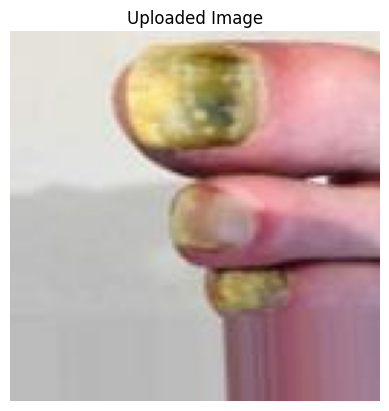

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted label: BA-cellulitis
----------------------------------------


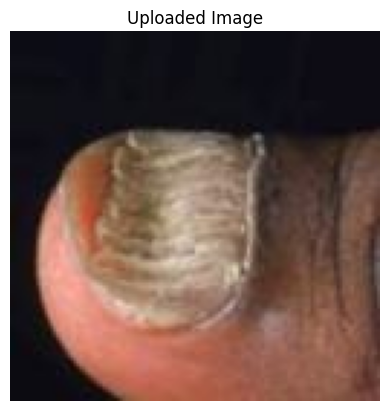

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
Predicted label: FU-nail-fungus
----------------------------------------


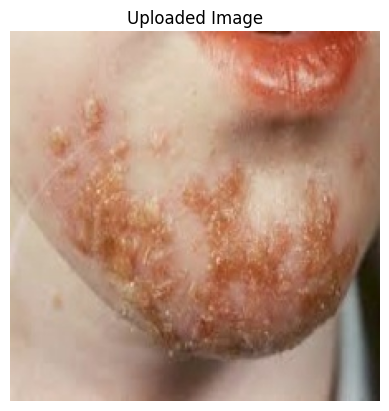

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
Predicted label: BA-impetigo
----------------------------------------


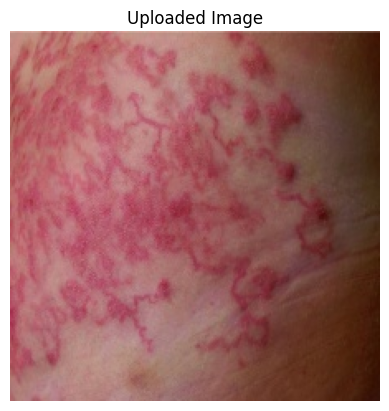

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Predicted label: PA-cutaneous-larva-migrans
----------------------------------------


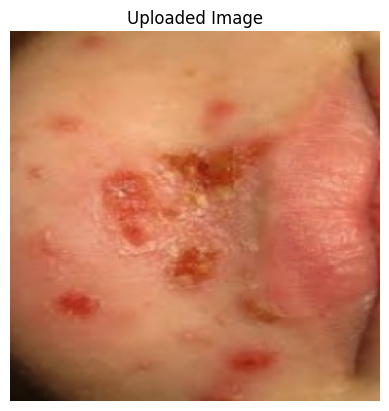

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
Predicted label: PA-cutaneous-larva-migrans
----------------------------------------


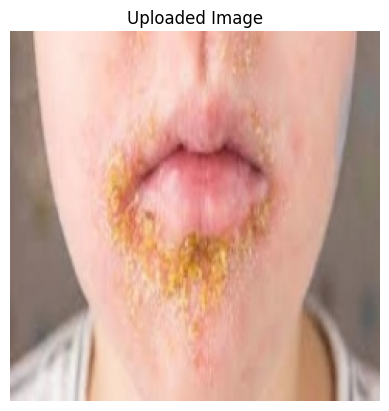

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
Predicted label: BA-impetigo
----------------------------------------


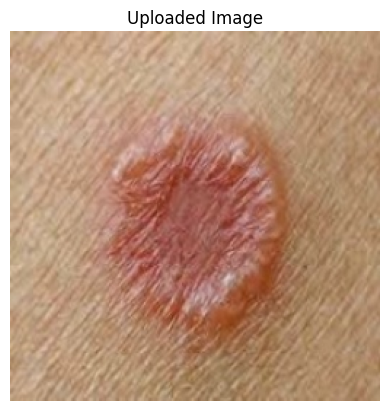

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
Predicted label: FU-ringworm
----------------------------------------


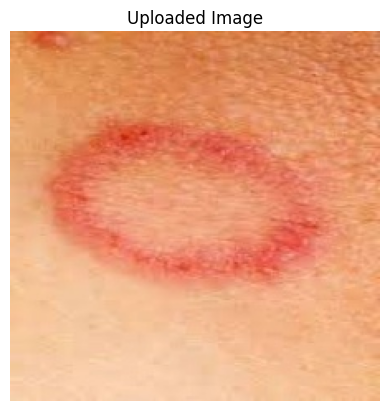

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
Predicted label: FU-ringworm
----------------------------------------


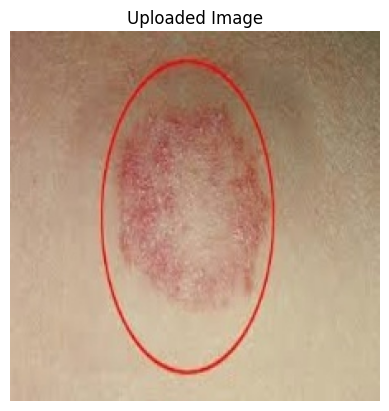

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
Predicted label: FU-ringworm
----------------------------------------


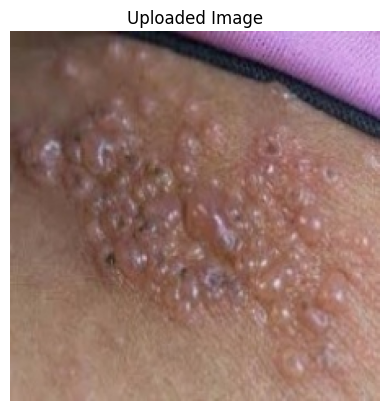

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
Predicted label: VI-shingles
----------------------------------------


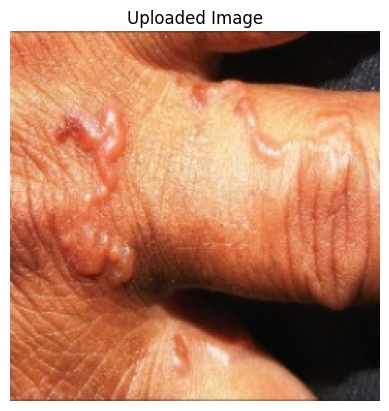

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
Predicted label: PA-cutaneous-larva-migrans
----------------------------------------


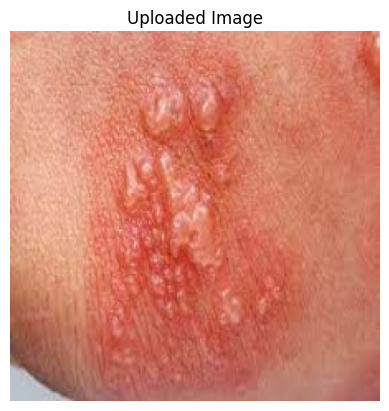

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
Predicted label: PA-cutaneous-larva-migrans
----------------------------------------


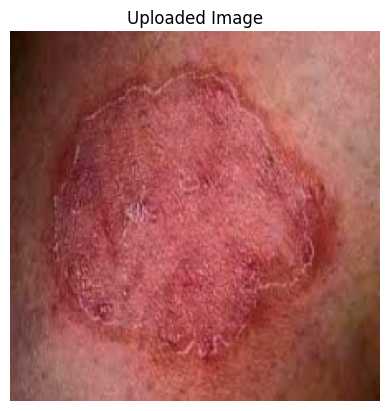

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
Predicted label: FU-ringworm
----------------------------------------


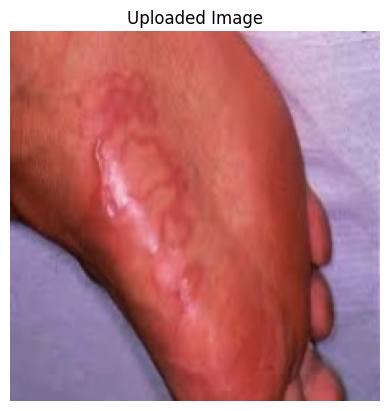

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
Predicted label: PA-cutaneous-larva-migrans
----------------------------------------


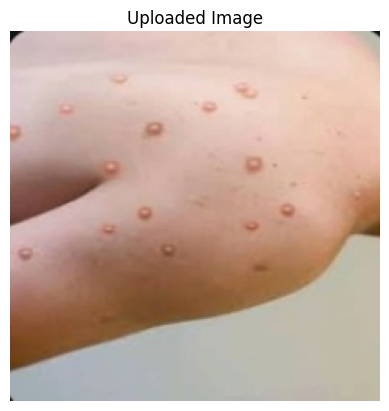

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
Predicted label: VI-chickenpox
----------------------------------------


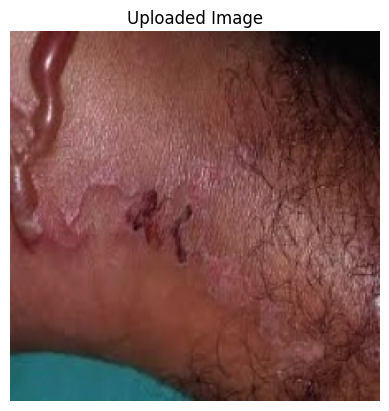

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
Predicted label: PA-cutaneous-larva-migrans
----------------------------------------


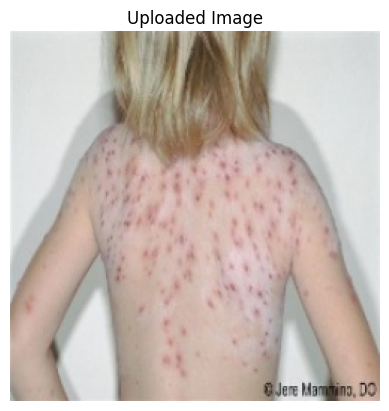

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
Predicted label: VI-chickenpox
----------------------------------------


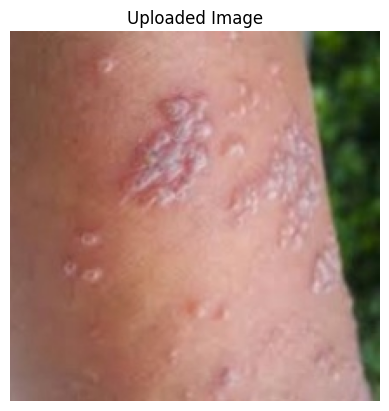

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
Predicted label: VI-shingles
----------------------------------------


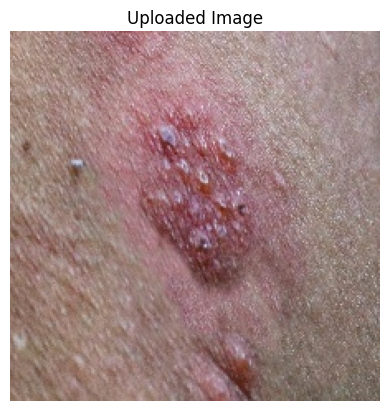

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
Predicted label: VI-shingles
----------------------------------------


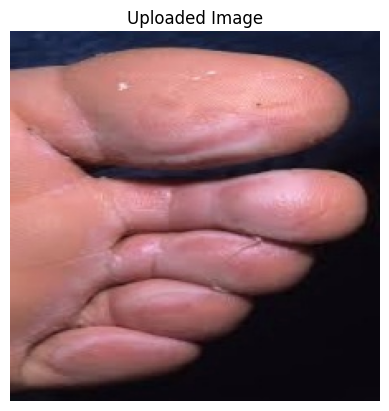

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
Predicted label: FU-athlete-foot
----------------------------------------


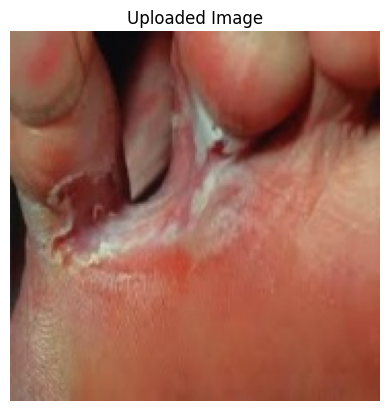

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
Predicted label: BA-cellulitis
----------------------------------------


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# Labels
labels = ['BA-cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus',
          'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles']

# Initialize and fit the LabelEncoder
le = LabelEncoder()
le.fit(labels)

# Upload images from your local machine
uploaded = files.upload()

# Function to process and predict an image
def predict_image(img):
    # Display the uploaded image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    # Preprocess the image
    img = cv2.resize(img, (299, 299))
    img = img.astype('float32')
    img = tf.keras.applications.resnet50.preprocess_input(img)
    img = np.expand_dims(img, axis=0)

    # Make predictions using the model
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_label = le.classes_[predicted_class_index]

    # Print the result
    print(f"Predicted label: {predicted_label}")
    print("-" * 40)  # Separator for clarity

# Process each uploaded image
for filename, file_content in uploaded.items():
    # Convert the uploaded file to an image array
    img = cv2.imdecode(np.frombuffer(file_content, np.uint8), cv2.IMREAD_COLOR)

    if img is None:
        print(f"Error: Unable to load the image {filename}")
        continue

    # Predict and display the image
    predict_image(img)